# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**

From the default agent.py code I could notice the following things:

**Main Observations:**
- The agent doesn't move at all. It just stays wherever it's first loaded in the city.
- The agent gets numeric rewards with decimal values. It's given positive rewards when, for instance, it stays still while the light is red. It gets negative rewards for staying still when the light is green and there's no oncoming traffic. There also seems to be a negative reward when there's a light change and the state doesn't change.

**Other observations:**
- Other agents seem to wander randomly.
- Other agents seem to behave perfectly, always stopping at red lights, waiting for no oncoming traffic to make left or right turns while on a red light and going straight while on green lights.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**

- **agent.py flags:**
    - **num_dummies**: it allows you to specify the number of dummy cars in the simulated grid. This would change the simulation depending on the size as well. If you had a bigger grid with fewer cars, our agent would run into situations like having to make a left turn waiting for the oncoming traffic to clear less often. And that could lead to our agent not learning well enough. On the other hand, if we had too many dummies in a small grid, our agent could find itself into situations in which it'll be unfairly penalized. For example, if our agent has to make a left turn, and the light changes, but the number of oncoming dummies is too large, then our agent might have to stay still during the whole green light, and be penalized for it. Naturally, it also changes the appearance of the simulation, producing grids that will look less or more crowded.
    - **grid_size**: it allows you to specify a number of columns and rows for the simulation grid. This flag is strongly related to the number of dummies as we just discussed and can change the simulation in the same ways. Visually it expectedly changes the simulation by producing a larger or smaller 'city'.
    - **enforce_deadline**: It can be set to True to enforce the use of a deadline metric. This can change the simulation in a significant way, since our agent would get a score based on whether or not it met the deadline. Having this set to true could lead to our agent rushing through the grid if it feels like it's not going to make it. Perhaps, it could even prefer to keep going on a red light or not waiting for the oncoming traffic to clear on a left turn.


- **environment.py environment class function:**
    
    The function called when the agent performs an action is the act() function, which takes in the agent and the action and does the following: 
    - it evaluates whether the action the agent wants to perform is legal.
    - if the action is legal it performs it and checks whether it was the correct action to do next or if it was just a legal action. 
    - it then rewards the agent based on whether the action was legal, it was the right thing to do or there was a traffic violation, in which case the reward is negative.
    
- **simulator.py render and render_text functions:**

    Here's what each of these functions does:
    - **render()**: The render function actually renders the simulation GUI. This means that it loads the pygame components, such as the blocks, the dummy cars, the floor lines, the direction arrows and the red lines that represent the red lights, and it displays all of this in the simulation window.
    - **render_text()**: The render_text function, on the other hand, produces a text result for the simulation steps that summarizes what was done by the agent at a given step, it looks like this:
    ```
    /-------------------
    | Step 0 Results
    \-------------------

    !! Agent state not been updated!
    Agent idled at a green light with no oncoming traffic. (rewarded -5.62)
    Agent not enforced to meet deadline.
    ```
- **planner.py next_waypoint():** 
    
    The first thing done by this function is checking if the agent's location is actually its destination. In case it isn't, it then checks first the East-West direction, and then the North-South direction. This is done to determine in which direction should the agent move next.


-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'Left'` (turn left), `'Right'` (turn right), or `'Forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


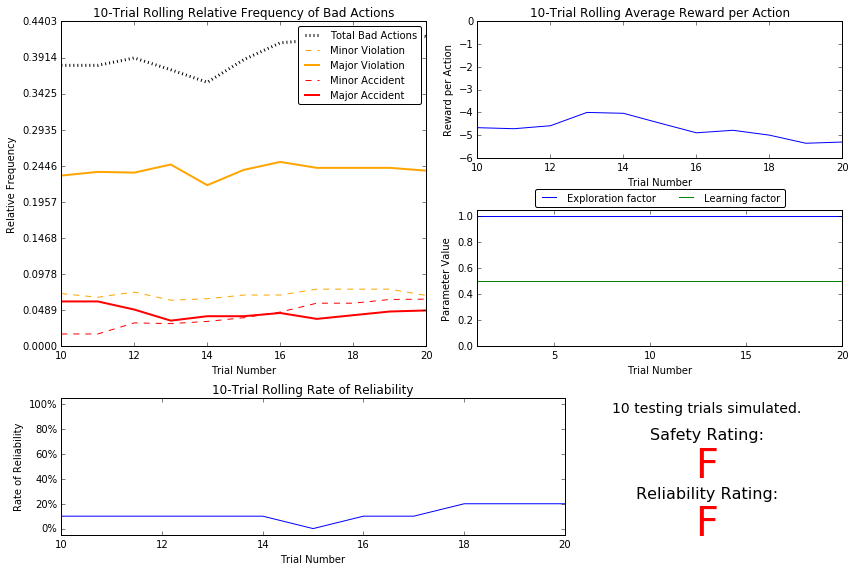

In [2]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no_1-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliabilty make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**

From the test results we can see that the agent with randomized actions is a pretty bad idea. Fortunately, computer simulations exist.

The agent made bad decisions all the time, and because of it behaving randomly, it committed an almost constant number of infractions. From the results we can see that it mostly committed major violations followed by minor violations and accidents. As should be expected, the agent got negative rewards in every trial, implying that it was penalized a lot. Which absolutely makes sense for an agent that takes random actions, as does the reliability. The reliability is explained by the fact that the agent didn't get to its destination in almost all trials. And this makes sense because it's really hard to get to a place with a limited number of steps and multiple possible moves at each step if the moves you're making are random. If we had no deadline, then the agent would just drive around until it got to its destination. I actually did run this experiment once and it took the agent 133 steps to get there! (kind of reminds me of some taxi drivers in Bogotá who drive you around to increase the fare).

As the number of trials increased, the agent got involved in about the same amount of accidents and committed about the same number of minor violations, and its rewards actually decreased. The type of violations committed didn't vary in any deterministic way, infractions seem to have varied a little in a random way, but being almost described by a horizontal line.

This 'Smartcab' should NEVER be consider safe nor reliable for its passengers. Since, if the passenger isn't immortal and extremely rich, it's very likely that he/she will never get to his/her destination. Also, if the passenger ever got to the destination, we don't know what his/her health conditions would be given all those accidents.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate?*

**Answer:**

For safety, all of the features are important but 'deadline'. 'waypoint' is the only one that's actually kind of tricky here, but the thing is that with the waypoint you can know where you're going next, that is, what action you need to take, But, the safety issue lies in the fact that there are rules to tell if you can execute the action. For instance, if your waypoint is left from your current position, you can only turn if the light is green and there's no oncoming traffic. So, in that example, for safety we required the features 'oncoming' to see that there weren't oncoming vehicles and 'light' to see that you could advance. Here's another one. Say you're going to turn right, but the light is red. You can make the right turn, provided that there's no traffic coming from the left. So, here you don't actually need 'light', but you need 'left', because if the vehicle at the left is going to keep straight, you can't go. So, in that example we required 'left' to know that there was no vehicle at the left or if it was, that it was going to turn; and 'right', to know that there was no vehicle at the right, or if there was, that it was going to move, clearing space for you. You could argue that 'waypoint' isn't actually important here, but there's no point in knowing the light color, oncoming traffic and moves to be made by the vehicles to the left and right if you don't know what action you're going to take. You could just stay still and then nothing would matter.

For efficiency, the feature that's probably the most relevant is 'waypoint'. Also 'deadline' is probably important. I'm not entirely sure of its relevance, since as long as you follow your waypoints, you should get to the destination in time. However, it may seem relevant looking at the following detailed example:


|                | Path 1     |        |    Path 2    |
|:--------------:|:------------:|:--------------:|:--------------:|
| Step 0|![alt text](images/estado-0.png "Initial state")|Imagine our agent finds itself in this situation with **3 moves to go**.<br> Its destination is just a left turn away but there's oncoming traffic|![alt text](images/estado-0.png "Initial state")|
| Step 1|![alt text](images/estado-1-1.png "Initial state")|One decision it could take is that it's going to wait until the <br> oncoming traffic clears, as shown on the left. <br> -------------- <br> Another decision it could take is to go around the block, which <br> is sort of a bold move since it would take it exactly 3 moves <br> if it never had to stop. For the sake of the example let's <br> suppose that's what happens. This is shown on the right. <br> **2 moves to go**|![alt text](images/estado-2-1.png "Initial state")|
| Step 2|![alt text](images/estado-1-2.png "Initial state")|For the agent that decided to wait, the oncoming traffic is now clear <br> but, unfortunately, the light has changed and it has to wait longer. <br> Also, it might even get penalized for not going on a green light. <br> --------------- <br> On the other hand, the vehicle that went around the block was clear for <br> making a left turn, so it makes it and it's so lucky that just as it is <br> arriving at the next intersection, the light changes. <br> **1 move to go** |![alt text](images/estado-2-2.png "Initial state")|
| Step 3| | The agent on the left is still stuck at the traffic light, so it didn't make it. <br> The agent on the right was clear for a left turn, so it took it. Making <br> it to the destination right on time. | |

What I tried to illustrate with the previous example is that there might be some situations where depending on the deadline or the remaining moves, you may choose to wait or you may have to find a different solution.

Getting back to the features, it's important to notice that even though safety and efficiency are different things and focus on different features, they need to work together to create a good agent.

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the evironment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**

We can drop the 'deadline' feature, as it becomes relevant in fewer cases. So, the features we would be keeping are: 'waypoint', 'light', 'left', 'right' and 'oncoming'.

So, we've got five features, four of which can take values in [None,'forward','left','right'] and one that can take values in ['Green','Red']. So, there are four of our features which can take four different values and one that can take two different values.

To get an insightful idea of what will go on with the state space, we'll say this:

- First, we'll order our features as follows:

    light, waypoint, left, right, oncoming

- Now, we'll start looking at the combinations starting from the back.
    - For the first one, we'll have the first four features stay the same, while the last one changes. So we get this possible combinations:
    
    
| light | waypoint | left | right | oncoming |
|:-----:|:--------:|:----:|:-----:|:--------:|
| Green |   left   | left |  left |   left   |
| Green |   left   | left |  left |   right  |
| Green |   left   | left |  left |  forward |
| Green |   left   | left |  left |   None   |
- 

    - Now we'll change the value for our fourth feature and do this again:
    
| light | waypoint | left | right | oncoming |
|:-----:|:--------:|:----:|:-----:|:--------:|
| Green |   left   | left | right |   left   |
| Green |   left   | left | right |   right  |
| Green |   left   | left | right |  forward |
| Green |   left   | left | right |   None   |
- 
    - And without any further iterations we can notice a pattern, and it's that we'll have to repeat every possible value of our last feature, for each value of our fourth feature. Which would give us so far a total of 4x4 = 16.
    - Now, what will happen for the third feature, is that for each value it can take, we'll have to repeat all 16 combinations of the last two features, giving us 4x16 = 64.
    - And now it becomes very intuitive that this can be calculated recursively, doing the same every time we go one feature back. So at the end we'll have:
    
`State space = 2 * 4 * 4 * 4 * 4 = 2 * 4⁴ = 2 * 256 = 512`

So, we can see that the state space grows really fast as we increase the features, getting 512 possible states, for which our agent, to get to see them, would need some kind of lengthy training. For now, we'll keep our five features, but if we dropped one, other than 'light', our state space's size would go down to 128.

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the interative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.01). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

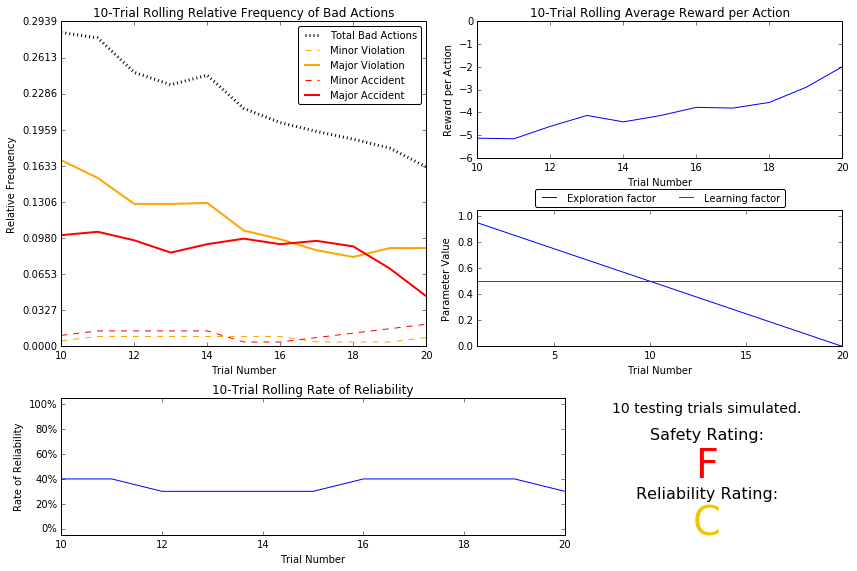

In [2]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**

From the test results we can see that this agent with a basic Q-Learning implementation works arguably better than the randomized one.

The agent began making some bad decisions, and committing some violations, but as it kept driving the number decreased until the relative frequency of violations committed was at about 0.17. From the results we can see that it mostly committed major violations followed by major accidents, however both of these types of accidents dropped significantly. As should be expected, this also means that the agent's rewards increased as these violations decreased, however, the rewards never got to be positive. The reliability tells us that this agent will get you to where you're going in time about 7 out of 10 times, the other 3 times, you might not make it. But, as the safety rating tells us, even though the agent might get you there, you might run some red lights or even crash a couple of times.

The agent and its learning could be improved in many ways. From the Q tree we can see that about 169 states were generated from the training. This is a low number for the possible states we had discussed. Also, from the Q-tree it's possible to see that there are states that didn't happen more than once, like this one: 
```
('forward', 'red', 'right', 'forward', None)
 -- forward : -40.36
 -- right : 0.00
 -- None : 0.00
 -- left : 0.00
```
This means that if on our testing trials our agent finds itself in this state, because of the way it makes decisions it will choose to go right, which on this particular case won't do harm, but if there was a vehicle coming from the left, our agent would crash. Also, because of the way our agent makes decisions, if it takes the first action and is given a positive reward, it won't try any other actions, since the max action will be the positive one, as the other ones were initially set to 0. The simplest way our agent could be improved, would be to train it a lot more times, since that would allow it to know most of the states (if not every state) and try different actions for each of them. Another possible way to improve it, would be to let it look further ahead, so that only the actual best action will award the agent positively.

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the impliciations it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

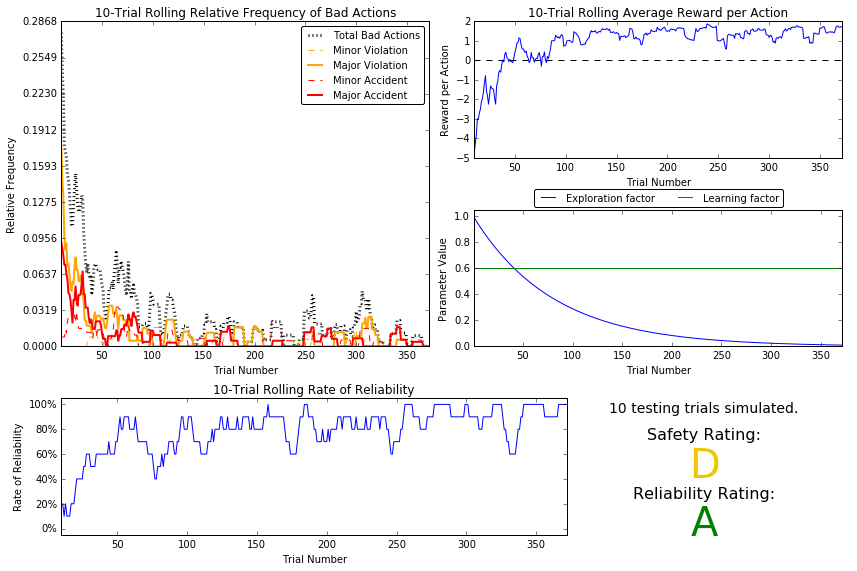

In [5]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**

In this trials, our agent got a better performance overall. This was acheived mainly because we trained it many more times than the previous one, on which we only ran 20 trials. For this tests, we used the exponential decay function: 

$ \epsilon = e^{-at} $

With

$a = -0.0124$

To implement the code for this without explicitly using $t$, we based on the fact that

$e^{-at} e^{-a} = e^{-a(t+1)}$

So, everytime we ran the simulation, the exploration factor was modified like:

$\epsilon = \epsilon * \epsilon ^ {-0.0124}$

Having such a decaying function turned out great, since as $\epsilon$ got smaller, more trials were required to bring it closer to our specified tolerance, training the smartcab through 372 simulations (this is also because we specified a small tolerance of 0.01).

The alpha rate used was of 0.6, which is slightly above the default alpha of 0.5 that had been set for the agent. For the epsilon-tolerance we chose 0.01, to somehow ensure that we would have a pretty fit agent before sending our simulated people for a ride on the trained vehicle.

Our agent actually improved pretty much since our last training session. Last time it didn't seem to care much about safety and would most of the time get you to your destination in time, but sometimes it just wouldn't. Now, it's very rare that it won't get you there in time and it seems to care a lot more about safety. But still, the metrics aren't good enough. D is a really bad rating for safety, since you cannot go around committing traffic violations, even if they're minor violations (and even if every human driver does). But, a great deal of smartcabs' value proposition should be an improve regarding safety. Also, if we could, it would be great to have the agent get you to your destination in time always, not only most times.

The Q-Learner has succesfully learned optimal policies for some states, but not for all of them. This is caused partly by the agent not being at every possible state enough times to find the best action to take, and partly because the agent will just choose the first max state, so, if for instance the agent finds itself in a state that looks like this in the Q-table:


```
('left', 'green', 'forward', 'forward', 'forward')
 -- forward : -1.23
 -- right : 0.00
 -- None : 0.00
 -- left : 0.00
```
 
 
Then, the action it will take, will be to go right. However, if 0 is the actual reward the agent gets by turning right in this state, it doesn't matter if staying still or going left would have given the agent a bigger reward, because it will always go right, since the max value for the actions is 0 and 'right' is the first action that has it. This is the same that will happen if for instance the action rewards look like this:

```
 -- forward : 1.23
 -- right : 0.00
 -- None : 0.00
 -- left : 0.00
```

It doesn't matter if taking another action would have given the agent a higher reward, because it has already found one that will award it positively, so it's not interested in testing further actions.

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8
Provide a few examples (using the states you've defined) of what an optimal policy for this problem would look like. Afterwards, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ Provide an example of a state and all state-action rewards recorded, and explain why it is the correct policy.

**Answer:** 

To further improve our agent a little bit in terms of safety, a couple of policies that choose the almost definitive action depending on some features were defined.

The first part of the state that was considered to accomplish this, was the 'waypoint' feature, since, it could be argued that what you should do mostly depends on what you have to do next. So the specified 'rules' were the following:

- If the next waypoint is left:
    - If the light is green:
        - If there aren't any oncoming vehicles:
            Turn left
        - If there are oncoming vehicles:
            In this case, the agent could go forward, right or stay still, so, we just prevent it from going left by assigning a negative value to the 'left' action on this state.
    - If the light is red:
        Then, it can stay still or turn right, so we invalidate the 'forward' and 'left' actions by assigning negative values to them        
- If the next waypoint is right:
    - If the light is green:
        Turn right
    - If the light is red but there's no traffic comming from the front or left:
        Turn right
    - If none of those conditions is true:
        Stay still
- If the next waypoint is forward:
    - If the light is green:
        Go forward
    - If the light is red:
        In this case the agent could legally do a right turn if there aren't oncoming vehicles or just stay still. However, it should never go left. So, we invalidated the left action for this state by assigning a negative value to it, to prevent it from being considered.
        
By setting these states we limit what the agent can learn by itself to much fewer situations, but we ensure that it doesn't break the law. It can still decide that to make a left turn it's better to wait on a green light, and other things like that, but the basic laws are enforced.

Here's what our agent achieved by combining enforced laws with learning:

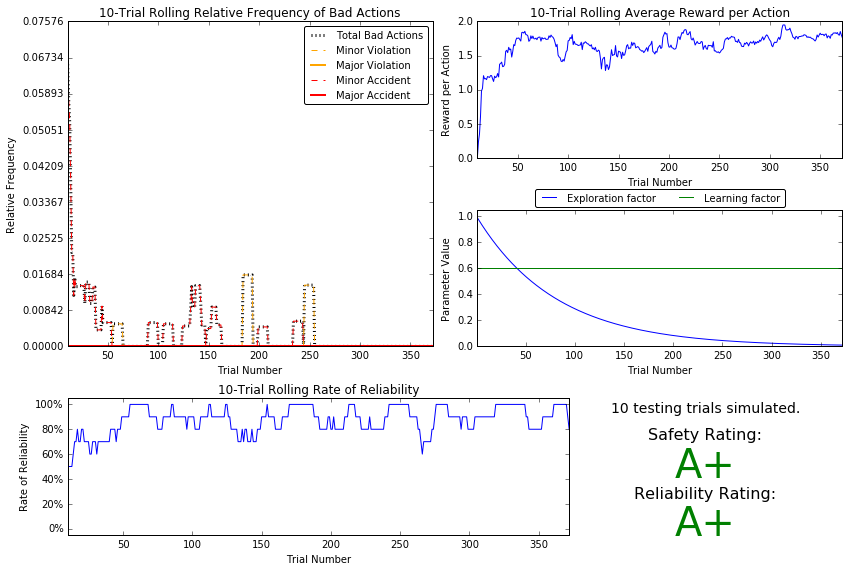

In [2]:
vs.plot_trials('sim_improved-learning.csv')

From these results we can tell the following:

**Reliability:**

About reliability we can see that at first, the agent will only reach its destination about half the times. But it very rapidly gets better, getting to 100% of the times in just a little over 50 trials. This behaviour can easily be explained by the fact that it can decide to do different things when, for instance, it has to make a left turn. So, it could probably wait to turn, turn right or go forward, and these actions it takes can take it closer or further away from its destination. From the moment it first gets a 100% reliability, it fluctuates a lot between 100% and sometimes as low as 60%. However, by the end of the trials, this fluctuation becomes less often, and happens within a smaller range. Meaning, in general terms, that the agent is becoming more reliable.

**Bad actions:**

Regarding bad actions, it's possible to see that our agent very rarely commits said actions. At the very first try it gets its absolute max of only 6.7% bad actions from the total. Before getting to 5 trials, the number drops below 2%. It then keeps to get better, until it gets to its first run without violations, in just a little over 5 trials. It then fluctuates between 0% and about 1.67% until around the 255th trial, which is the moment from when it no longer commits any more traffic violations of any kind.

**Rewards:**

We can see that right from the beginning, the agent doesn't get any negative rewards. In about the first five trials, the rewards are between 0 and 1, but from that point on, all rewards fluctuate between values from 1 to 2. And, from about the 155th trial on, all the rewards are above 1.5, getting everytime closer to 2.


**To sum it up:**

In conclusion, we can see that our agent has learned correct policies for most states, granting us a final grade of A+ for both safety and reliability on our ten tests.

We can see from the log files that some states only had to be tried once, like this one:

```
('forward', 'green', None, 'forward', None)
 -- forward : 2.25
 -- right : 0.00
 -- None : 0.00
 -- left : 0.00
```
In this example, the agent has to go forward, and the light is green, so it just goes forward. Which is naturally the best action. And we can also find states that had to be tried a little bit more, like this one:

```
('forward', 'red', 'forward', 'forward', 'left')
 -- forward : -1.00
 -- right : -20.38
 -- None : 1.79
 -- left : -1.00
```
In this example, the agent had to go forward but the light was red. So, the rules we defined, told it not to go forward or left by assigning those -1.00 values. But then, it learned that it was best for it to stay still, since by turning right it was severely penalized, which makes sense, because the vehicle at the left was going forward, so our agent would have crashed.

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propogating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

I think that the characteristic that relates to the agent and invalidates the use of future rewards is the way that states are constructed. What I mean by this, is that the reward for an action is calculated depending on the agent's next waypoint, and what the vehicles around the agent are doing. However, this is evaluated for a current state, so, take a look at this:

```
              A
             / \
            /   \
           B     C
```

Now, imagine that A is the current state the agent is in, and B and C are the states it could move to by taking two different actions. Since the agent is currently at state A, it would have to simulate a step to actually get the resulting environment for B and simulate another step to actually get the resulting environment for C. But what it in fact does is to evaluate the reward for B and C with the features of A, or at most evaluate them with what's surrounding the positions of B and C for the t in which A happens. Ignoring that after taking the actions to move from A to B or C, every car in the environment will have moved as well. So, rewards would be wrong.

The other thing I think would interfere with future rewards is the reason rewards get awarded. What I mean by this is that rewards don't care about the deadline and destination, or at least not as much as they care about taking actions that are legally allowed. Let's take a look at the following picture

![alt text](images/rewards.png "Agent rewarded")

In the picture, we can see that the agent got positively rewarded despite not following the waypoint and despite having very few steps left. That's the first part of it. The second part, is that agents don't get specially big rewards for arriving at the destination. So, the agent could go around just taking the legal move that maximizes its reward, even if it's not following the waypoint. Also, if it actually got to the waypoint it would mean that it stopped getting rewards, then, it could perhaps delay getting to the destination as much as possible in order to keep getting rewards, which could lead to it becoming less reliable.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.